In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

comebacks = pd.read_csv('playoffComebacks.csv')
leads = pd.read_csv('playoffLeads.csv')
comeback_count = []
lead_mean = []
years = range(1997, 2025)
    
for col in leads.columns:
    sum = 0
    clean_col = leads[col].dropna()
    for point in clean_col:
        sum += point
    sum /= len(clean_col)
    lead_mean.append(sum)

for col in comebacks.columns:
    count = 0
    clean_col = comebacks[col].dropna()
    for point in clean_col:
        if point == 0:
            count += 1
    comeback_count.append(count)

In [3]:

print(np.std(lead_mean), np.std(comeback_count))
print(lead_mean, np.mean(lead_mean), np.median(lead_mean))
print(comeback_count)


1.5393587215179014 2.83293314500742
[17.25, 16.323943661971832, 16.484848484848484, 16.84, 18.239436619718308, 16.309859154929576, 17.579545454545453, 17.0609756097561, 17.464285714285715, 16.865168539325843, 16.430379746835442, 19.11627906976744, 19.51764705882353, 18.70731707317073, 15.666666666666666, 17.464285714285715, 18.011764705882353, 18.258426966292134, 18.382716049382715, 20.825581395348838, 20.670886075949365, 19.853658536585368, 19.609756097560975, 19.180722891566266, 20.08235294117647, 20.666666666666668, 18.785714285714285, 21.073170731707318] 18.311501996884413 18.24893179300522
[7, 5, 5, 6, 2, 5, 8, 4, 6, 1, 4, 5, 12, 7, 6, 5, 5, 6, 7, 12, 13, 4, 8, 8, 9, 8, 3, 3]


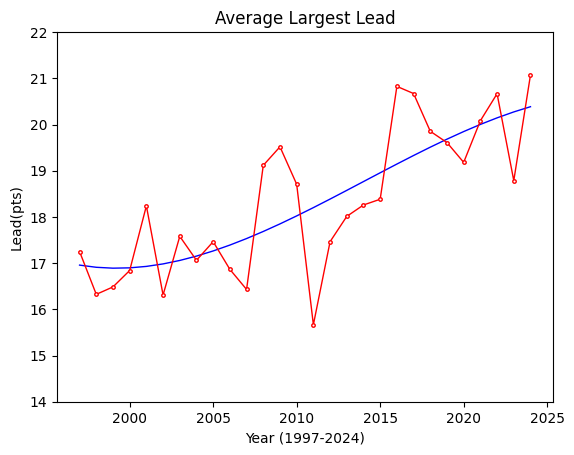

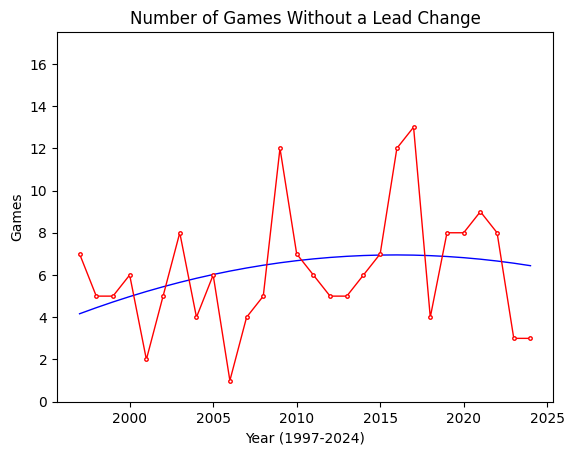

In [4]:
coefficients = np.polyfit(years, lead_mean, deg=3)
trendline = np.poly1d(coefficients)
trendline_y = trendline(years)
plt.plot(years, trendline_y, color='blue', linewidth=1)
plt.plot(years, lead_mean, color='red', linewidth=1, marker='.', markersize=5, markerfacecolor='white')
plt.ylim(14,22)
plt.ylabel('Lead(pts)')
plt.xlabel('Year (1997-2024)')
plt.title('Average Largest Lead')
plt.show()


coefficients = np.polyfit(years, comeback_count, deg=2)
trendline = np.poly1d(coefficients)
trendline_y = trendline(years)
plt.plot(years, trendline_y, color='blue', linewidth=1)
plt.plot(years, comeback_count, color='red', linewidth=1, marker='.', markersize=5, markerfacecolor='white')
plt.ylim(0,17.5)
plt.ylabel('Games')
plt.xlabel('Year (1997-2024)')
plt.title('Number of Games Without a Lead Change')
plt.show()

The trend for leads over the years indicates that there is a significant difference between the play in seasons from 1997-2015 and 2016+ leading to larger leads on average throughout the playoffs in modern years. Lead changes are more reflective of how much better the top teams are compared to the rest of the league. Which is why two of the seasons with the most games without a lead change have the 2016-2017 and 2015-2016 Golden State Warriors who have some of the most dominant postseason runs of all time. 

In [5]:
yearsLeads = ['2009', '2011', '2016', '2017', '2018']
yearsComebacks = ['2009', '2017', '2018']
playoffLeadsCleaned= []
playoffComebacksCleaned = []
for year in yearsLeads:
    leadsCol = leads[year]
    cleanCol = leadsCol.dropna()
    clean = list()
    for cell in cleanCol:
        clean.append(cell)  
    clean = np.array(clean)
    playoffLeadsCleaned.append(clean)


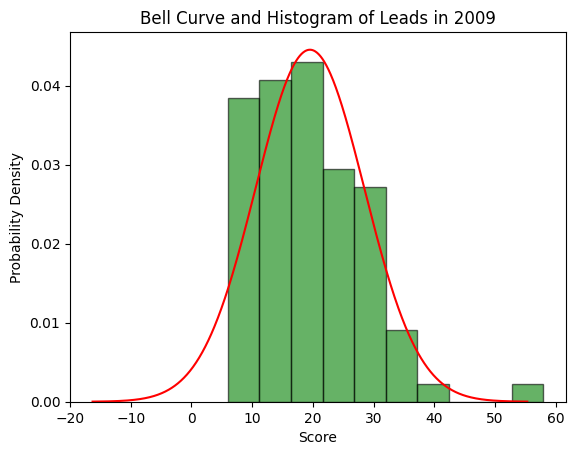

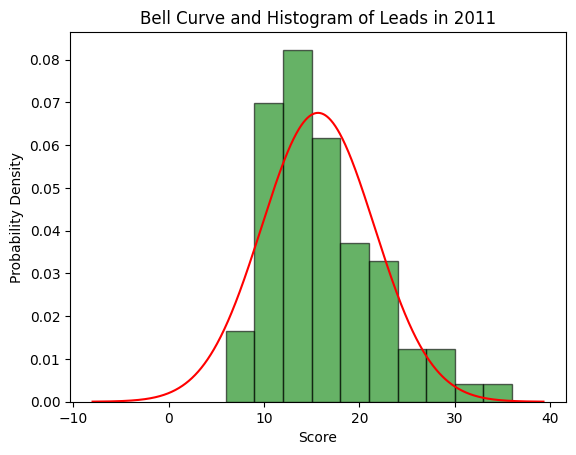

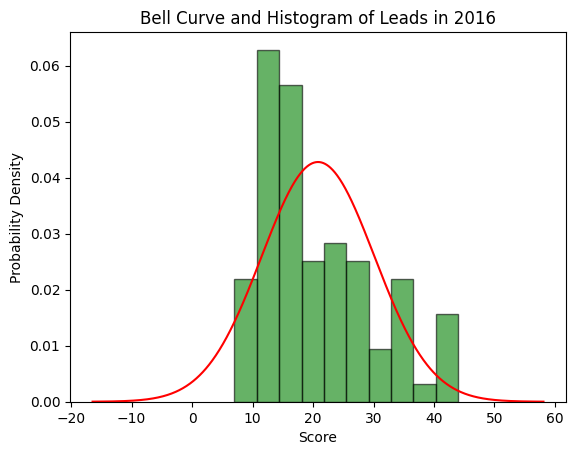

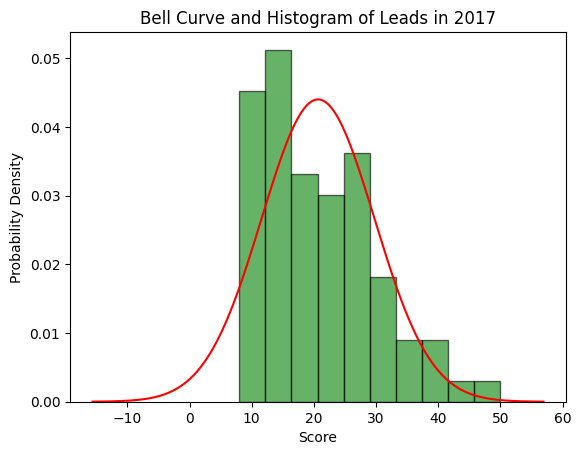

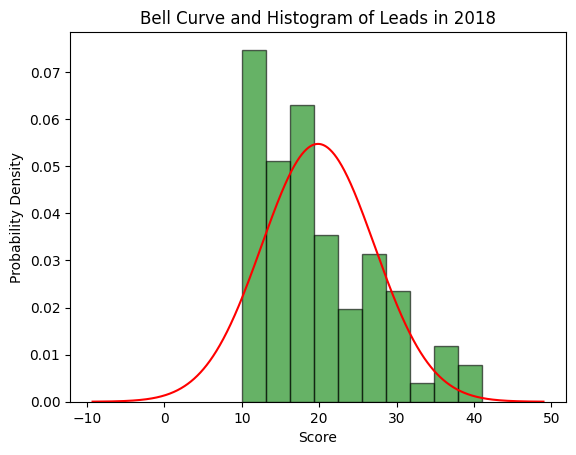

In [6]:
for idx, clean in enumerate(playoffLeadsCleaned):
    games = range(1,len(clean)+1)
    std_dev = np.std(clean)
    mean = np.mean(clean)
    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
    y = stats.norm.pdf(x, mean, std_dev)
    plt.hist(clean, bins=10, density=True, alpha=0.6, color='g', edgecolor='black')
    plt.plot(x, y, color='red')
    plt.xlabel('Score')
    plt.ylabel('Probability Density')
    plt.title(f'Bell Curve and Histogram of Leads in {yearsLeads[idx]}')
    plt.show()


In [15]:
for year in [ '2016', '2018']:
    leadsCol = leads[year]
    cleanCol = leadsCol.dropna()
    t_stat, p_value = stats.ttest_1samp(cleanCol, np.mean(lead_mean))
    print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 2.486945239867086, P-value: 0.014839514258574603
T-statistic: 1.904677797593674, P-value: 0.06037164079504327


In [16]:
for year in ['2008', '2011']:
    leadsCol = leads[year]
    cleanCol = leadsCol.dropna()
    t_stat, p_value = stats.ttest_1samp(cleanCol, np.mean(lead_mean))
    print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 1.0235779830939606, P-value: 0.3089389543343482
T-statistic: -4.0049773273438305, P-value: 0.00013800162357397887
